<h2> SVM (Support Vector Machines)</h2>

we used SVM (Support Vector Machines) to build and train a model using human cell records, and classify cells to whether the samples are benign or malignant.

SVM works by mapping data to a high-dimensional feature space so that data points can be categorized, even when the data are not  linearly separable. A separator between the categories is found, then the data is transformed in such a way that the separator could be drawn as a hyperplane. Following this, characteristics of new data can be used to predict the group to which a new record should belong.

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3> About Data</h3>

The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:
	


<b>ID</b>:	patient identifier  ,
<b>Clump</b>:	Clump thickness  ,
<b>UnifSize</b>:	Uniformity of cell size  ,
<b>UnifShape</b>:	Uniformity of cell shape  ,
<b>MargAdh</b>:	Marginal adhesion  ,
<b>SingEpiSize</b>:	Single epithelial cell size  ,
<b>BareNu</b>:	Bare nuclei  ,
<b>BlandChrom</b>:	Bland chromatin  ,
<b>NormNucl</b>:	Normal nucleoli  ,
<b>Mit</b>:	Mitoses  ,
<b>Class</b>:	Benign or malignant





In [26]:
filepath='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cell_samples.csv'

In [29]:
df = pd.read_csv(filepath)

print(df.shape)
df.head()

(699, 11)


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4).

In [30]:
df['Class'].unique()

array([2, 4], dtype=int64)

distribution of the classes based on Clump thickness and Uniformity of cell size

<function matplotlib.pyplot.show(*args, **kw)>

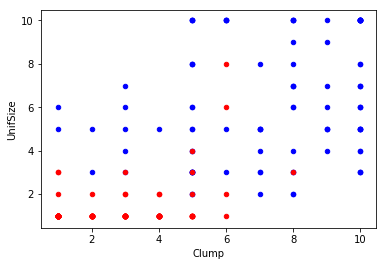

In [31]:
ax1=df[df['Class']==4][0:100].plot(kind='scatter',x='Clump',y='UnifSize',color='blue')
df[df['Class']==2][0:100].plot(kind='scatter',x='Clump',y='UnifSize',color='red',ax=ax1)
plt.show

<h3> Data preprocessing</h3>

We replace ? values with Nan values so that will obtain Nan values easier with numpy commands

In [32]:
df.replace('?',np.nan,inplace=True)

We can check null values for all dataset

In [33]:
miss_values=df.isnull()
for i in miss_values.columns.values.tolist():
    print(i)
    print(miss_values[i].value_counts())
    print('')


ID
False    699
Name: ID, dtype: int64

Clump
False    699
Name: Clump, dtype: int64

UnifSize
False    699
Name: UnifSize, dtype: int64

UnifShape
False    699
Name: UnifShape, dtype: int64

MargAdh
False    699
Name: MargAdh, dtype: int64

SingEpiSize
False    699
Name: SingEpiSize, dtype: int64

BareNuc
False    683
True      16
Name: BareNuc, dtype: int64

BlandChrom
False    699
Name: BlandChrom, dtype: int64

NormNucl
False    699
Name: NormNucl, dtype: int64

Mit
False    699
Name: Mit, dtype: int64

Class
False    699
Name: Class, dtype: int64



As seen, we have 16 Nan values for BareNuc feature and because number of them is small we will drop row of them

In [34]:
df.dropna(subset=['BareNuc'],axis=0 , inplace=True)

we check BareNuc feature again for Nan values for sure

In [35]:
df['BareNuc'].isnull().value_counts()

False    683
Name: BareNuc, dtype: int64

In [37]:
print(df.shape)
df.head()

(683, 11)


,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


the BareNuc column includes some values that are not numerical

In [38]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

We convert BareNuc feature type to numeric

In [39]:
df['BareNuc']=pd.to_numeric(df['BareNuc'])

In [40]:
df['BareNuc'].dtypes

dtype('int64')

In [41]:

X=np.asarray(df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize','BareNuc', 'BlandChrom',
      'NormNucl', 'Mit']])

y=np.asarray(df['Class'])

<h3> Train/Test Dataset</h3>

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


<h3> modeling</h3>

The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called kernelling. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

1.linear
2.poly
3.Radial basis function (RBF)
4.Sigmoid

In [44]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

C:\Users\sara\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

<h3> prediction</h3>

In [45]:
yhat = clf.predict(X_test)
yhat [0:5]

array([2, 4, 2, 4, 2], dtype=int64)

<h3> Evaluation</h3>

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [47]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

<h4>  confusion matrix</h4>

In [48]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[2,4])
np.set_printoptions(precision=2)

In [49]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

   micro avg       0.96      0.96      0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137



Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


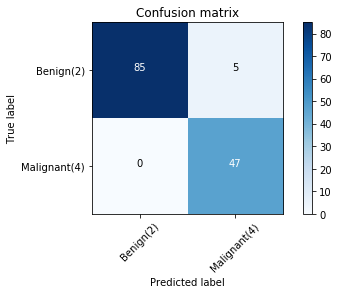

In [50]:
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

above confusion matrix says, 50 samples in test set are belong to Benighn class and this model could predict 85 of samples correctly to true class(true positive) and just 5 samples predicted uncorrectly to another class(false negative).
47 samples in test set are belong to Malignant class and this model could predict all 47  samples correctly to true class(true negative).

In [51]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.9639038982104676

We can say this model can predict 96 percent correctly class of unseen data

<h4> jaccard</h4>

In [52]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.9635036496350365

<h3> Conclusion</h3>

After Exploratory data , we used SVM model for predict label class for new unseen data and evaluated  the model with confusionmatrix and jaccard index, and finally we can claim this model can predict with 96 percent accuracy on label class of unseen data.